# Задание 3

Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

## Подготовка данных

In [14]:
import numpy as np

from scipy import stats
from statsmodels.stats import weightstats as stests

import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('/content/91bb356a-000f-46b8-9777-861833a70faa.csv')
print(df.columns.values)
print()
df.info()

['group' 'client_id' 'click_flg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20033 entries, 0 to 20032
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   group      20033 non-null  object
 1   client_id  20033 non-null  int64 
 2   click_flg  20033 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 469.6+ KB


In [18]:
df

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1
...,...,...,...
20028,control,20029,0
20029,control,20030,1
20030,control,20031,1
20031,control,20032,0


## Проверка на зависимость

In [19]:
# test and control groups
test = df[df.group == 'test'].click_flg.to_numpy()
control = df[df.group == 'control'].click_flg.to_numpy()

print("test size: " + str(test.shape) + " control size: " + str(control.shape))

test size: (10023,) control size: (10010,)


In [20]:
# Is there any depencies?
df.client_id.unique().shape

(20033,)

Выборки независимы, поскольку число уникальных элементов равно общему числу элементов. 

## Проверка на нормальность

Построим графики распределения таргета по его частоте появления

No handles with labels found to put in legend.


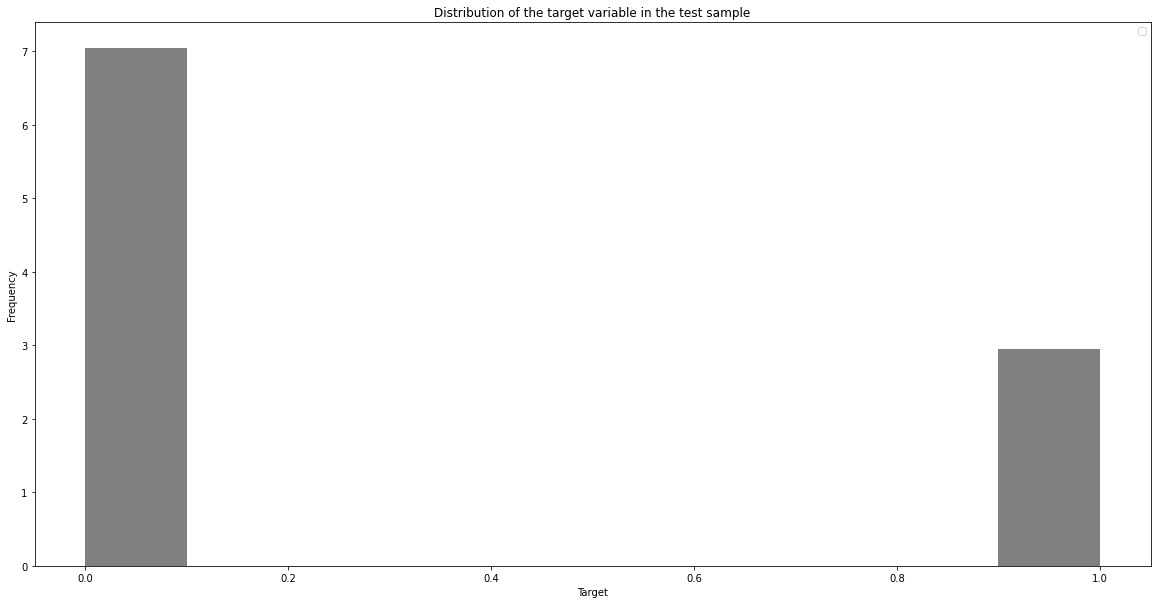

In [22]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=10, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the test sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

No handles with labels found to put in legend.


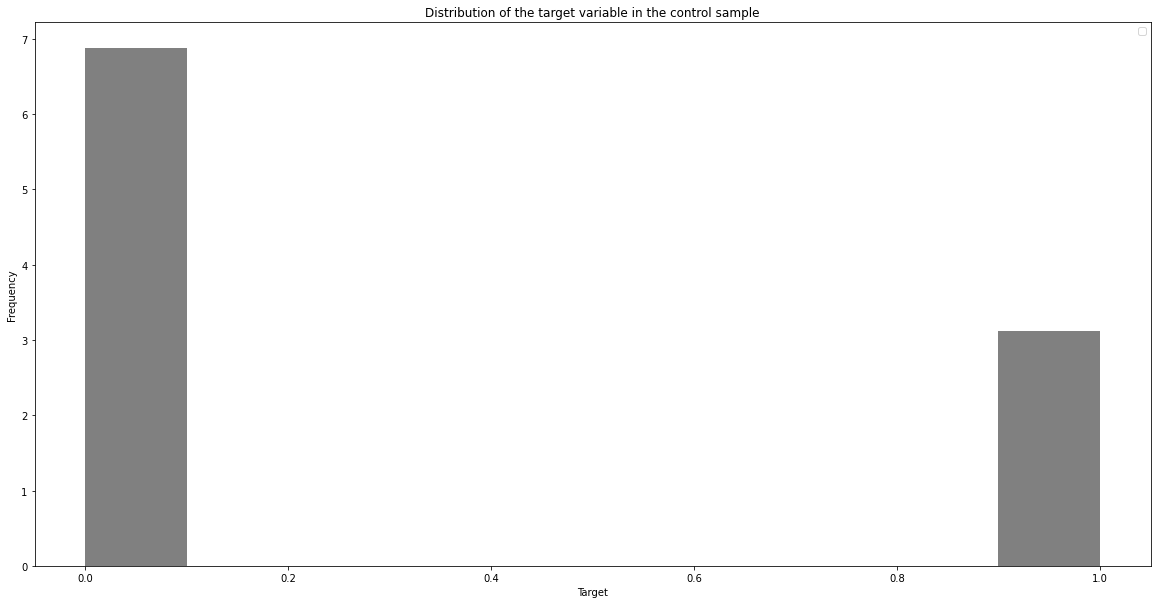

In [23]:
plt.figure(figsize=(20,10))
plt.hist(control, bins=10, density=True, color='gray')
plt.legend()
plt.title('Distribution of the target variable in the control sample')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

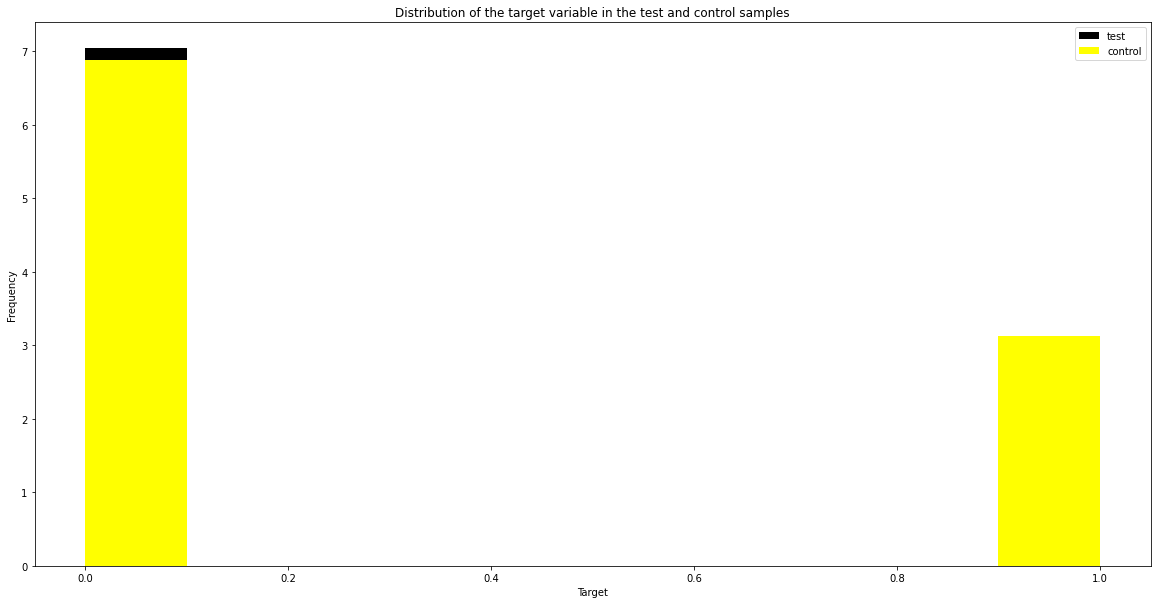

In [25]:
plt.figure(figsize=(20,10))
plt.hist(test, bins=10, density=True, color='black', label='test')
plt.hist(control, bins=10, density=True, color='yellow', label='control')
plt.legend()
plt.title('Distribution of the target variable in the test and control samples')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

Распределения похожи

## Проверим Z критерий

In [27]:
n1 = control.shape[0]
n2 = test.shape[0]

p1 = np.sum(control) / n1
p2 = np.sum(test) / n2

P = (np.sum(control) + np.sum(test))/(n1 + n2)
Z = (p1 - p2)/np.sqrt(P*(1 - P)*(1/n1 + 1/n2))

p = 1 - stats.norm.cdf(Z)
print('p: ', p)

p:  0.0047270250062207975


Конверсия увеличилась